# Numerically solving ODEs

## Preparation for Python

### Import libraries

In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

## Introduction

### ODE definition

An ordinary differential equation (ODE) describes the rate of change of a function $y(x)$ with respect to an independent variable $x$ and the function value itself.

The general form of a first-order ODE is:
$$
y' = f(x, y)
$$

Moreover, higher-order ODEs can be transformed into a system of first-order ODEs. Therefore, it is often beneficial to focus on solving first-order ODEs.

### Solving ODEs

To obtain a unique solution of the ODE, an initial condition, typically $y(x_0) = y_0$, is required to select a specific solution from a family of possible solutions. This is known as an initial value problem (IVP).

For complex ODEs where an analytical solution is not feasible, numerical methods can be employed to approximate the solution accurately. These methods are particularly useful for solving initial value problems (IVPs) where exact solutions are difficult or impossible to derive.

### Sampled functions

In math, a function $y(x)$ maps a real number $x$ to a real value $y(x)$. But for computers, a function is defined at discrete points $x_k$, a process known as discretization.

ODE solvers compute solutions at these discrete points, resulting in a vector of values $y_k$.

### Error analysis

#### Taylor's series expansion for error analysis

The Taylor series expansion of a function $f(x)$ around the point $x_0$ (the expansion center) with a single independent variable $x$ is given by:
$$
f(x) = f(x_0) + (x - x_0) \left.\frac{df}{dx}\right|_{x_0} + \frac{(x - x_0)^2}{2!} \left.\frac{d^2f}{dx^2}\right|_{x_0} + \frac{(x - x_0)^3}{3!} \left.\frac{d^3f}{dx^3}\right|_{x_0} + \ldots + \frac{(x - x_0)^p}{p!} \left.\frac{d^pf}{dx^p}\right|_{x_0}
$$

The Taylor series expansion can be used to verify the accuracy of numerical approximations by comparing the terms of the infinite series with the finite approximations.

The error itself is usually expressed using the $O(h)$-notation, where all terms of order $h$ and higher are neglected. The power of $h$ in the $O(h)$-notation corresponds to the power of $h$ where the first term in the infinite Taylor series that is not included in the finite approximation appears.

#### Derivative truncation error

The derivative approximation truncation error  $\tau_h^{(n)}(x)$ of a order $n$ derivative $f^{(n)}$ can be expressed as:
$$
\tau_h^{(n)}(x) = f_\text{approx}^{(n)}(x) - f_\text{Taylor}^{(n)}(x)
$$

Or if the actual derivative gets approximated with Taylor's series:
$$
f_\text{Taylor}^{(n)}(x) = f_\text{approx}^{(n)}(x) - \tau_h^{(n)}(x)
$$

The $O(h)$-notation can be expressed from the $\tau_h^{(n)}(x)$ term, since this term is the error-term of the approximation.

### Differentiation on the computer

Before solving differential equations on a computer, it's important to understand how differentiation is approximated. The derivative of a function $y(x)$ is defined as:
$$
\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{y(x + \Delta x) - y(x)}{\Delta x}
$$
In numerical computation, this limit cannot be directly represented because data is usually discrete and floating-point numbers do not approach zero smoothly. Instead, derivatives are approximated using finite differences.

($\Delta x$ is often denoted as the step size $h$ in the context of numerical differentiation.)

### Finite derivatives from Taylor's series

#### Forward difference

Express $y(x + h)$ with $x_0 = x$ using Taylor's series expansion:
$$
y(x + h) = y(x) + h \left.\frac{dy}{dx}\right|_{x} + \frac{h^2}{2!} \left.\frac{d^2y}{dx^2}\right|_{x} + \frac{h^3}{3!} \left.\frac{d^3y}{dx^3}\right|_{x} + \ldots + \frac{h^p}{p!} \left.\frac{d^py}{dx^p}\right|_{x}
$$

Solve for the first derivative of $y(x)$ and make the assumption that $h$ is very small $\to$ terms with power of $h$ and higher are errors:

(only the term with the lowest power of $h$ is considered to be the leading order error term)

$$
\frac{dy}{dx} = \frac{y(x + h) - y(x)}{h} - \underbrace{\frac{h}{2} \left.\frac{d^2y}{dx^2}\right|_{x}}_{\substack{\text{leading order} \\ \text{error term}}} - \frac{h^2}{6} \left.\frac{d^3y}{dx^3}\right|_{x} - \ldots - \frac{h^{p-1}}{p!} \left.\frac{d^py}{dx^p}\right|_{x}
$$

Describe the first derivative of $y(x)$ with $O(h)$ as the leading error term, where the error is proportional to $h$ and higher-order terms are neglected:
$$
\frac{dy}{dx} = \frac{y(x + h) - y(x)}{h} + O(h)
$$
In this case, the forward difference approximation introduces an error proportional to $h$, while this error decreases as $h$ approaches zero, it remains present in computations with finite $h$, scaling as $O(h)$.

Remove the error term to obtain the forward difference approximation:
$$
\boxed{
    \frac{dy}{dx} \approx \frac{y(x + h) - y(x)}{h}
}\quad\text{Forward difference formula}
$$

#### Backward difference

Express $y(x - h)$ with $x_0 = x$ using Taylor's series expansion:
$$
y(x - h) = y(x) - h \left.\frac{dy}{dx}\right|_{x} + \frac{h^2}{2!} \left.\frac{d^2y}{dx^2}\right|_{x} - \frac{h^3}{3!} \left.\frac{d^3y}{dx^3}\right|_{x} + \ldots + (-1)^p \frac{h^p}{p!} \left.\frac{d^py}{dx^p}\right|_{x}
$$

Solve for the first derivative of $y(x)$ and make the assumption that $h$ is very small $\to$ terms with power of $h$ and higher are errors:

(only the term with the lowest power of $h$ is considered to be the leading order error term)

$$
\frac{dy}{dx} = \frac{y(x) - y(x - h)}{h} - \underbrace{\frac{h}{2} \left.\frac{d^2y}{dx^2}\right|_{x}}_{\substack{\text{leading order} \\ \text{error term}}} - \frac{h^2}{6} \left.\frac{d^3y}{dx^3}\right|_{x} - \ldots - \frac{h^{p-1}}{p!} \left.\frac{d^py}{dx^p}\right|_{x}
$$

Describe the first derivative of $y(x)$ with $O(h)$ as the leading error term, where the error is proportional to $h$ and higher-order terms are neglected:
$$
\frac{dy}{dx} = \frac{y(x) - y(x - h)}{h} + O(h)
$$

In this case, the backward difference approximation introduces an error proportional to $h$, while this error decreases as $h$ approaches zero, it remains present in computations with finite $h$, scaling as $O(h)$.

Remove the error term to obtain the backward difference approximation:
$$
\boxed{
    \frac{dy}{dx} \approx \frac{y(x) - y(x - h)}{h}
}\quad\text{Backward difference formula}
$$

#### Central difference

Finding expression to cancel the leading order error term of order $h$ in forward and backward difference approximations.
$$
y(x+h) - y(x-h) = 2h\left.\frac{dy}{dx}\right|_{x} + \frac{2h^3}{6}\left.\frac{d^3y}{dx^3}\right|_{x} + \ldots + \frac{2h^p}{p!}\left.\frac{d^py}{dx^p}\right|_{x} \quad (p\hat{=}\text{odd})
$$

Solve for the first derivative of $y(x)$:
$$
\frac{dy}{dx} = \frac{y(x+h) - y(x-h)}{2h} - \underbrace{\frac{h^2}{3}\left.\frac{d^3y}{dx^3}\right|_{x}}_{\substack{\text{leading order} \\ \text{error term}}} - \frac{h^3}{12}\left.\frac{d^4y}{dx^4}\right|_{x} - \ldots - \frac{h^{p-1}}{2 p!}\left.\frac{d^py}{dx^p}\right|_{x} \quad (p\hat{=} \text{odd})
$$

Describe the first derivative of $y(x)$ with $O(h^2)$ as the leading order error term, where the error is proportional to $h^2$ and higher-order terms are neglected:
$$
\frac{dy}{dx} = \frac{y(x+h) - y(x-h)}{2h} + O(h^2)
$$

In this case, the central difference approximation introduces an error proportional to $h^2$. While this error decreases as $h$ approaches zero, it remains present in computations with finite $h$, scaling as $O(h^2)$.

The central difference formula, by discarding $O(h^2)$ terms, incurs a smaller truncation error than the $O(h)$ error in forward or backward differences, making it a more accurate method.

Remove the error term to obtain the central difference approximation:
$$
\boxed{
    \frac{dy}{dx} \approx \frac{y(x+h) - y(x-h)}{2h}
} \quad \text{Central difference formula}
$$

#### Second derivative

Build sum of Forward and Backward difference approximations:
$$
y(x + h) + y(x - h) = 2y(x) + h^2 \frac{d^2y}{dx^2} + \frac{h^4}{4!} \frac{d^4y}{dx^4} + \frac{h^6}{6!} \frac{d^6y}{dx^6} + \ldots + \frac{h^{p}}{p!} \frac{d^py}{dx^p}\quad (p\hat{=}\text{even})
$$

Solve for the second derivative of $y(x)$:
$$
\frac{d^2y}{dx^2} = \frac{y(x + h) - 2y(x) + y(x - h)}{h^2} - \underbrace{\frac{h^2}{4!} \frac{d^4y}{dx^4}}_{\substack{\text{leading order} \\ \text{error term}}} - \frac{h^4}{6!} \frac{d^6y}{dx^6} - \ldots - \frac{h^{p-2}}{p!} \frac{d^py}{dx^p}\quad (p\hat{=}\text{even})
$$

Describe the second derivative of $y(x)$ with $O(h^2)$ as the leading error term, where the error is proportional to $h^2$ and higher-order terms are neglected:
$$
\frac{d^2y}{dx^2} = \frac{y(x + h) - 2y(x) + y(x - h)}{h^2} + O(h^2)
$$

In this case, the finite second derivative formula introduces an error proportional to $h^2$. While this error decreases as $h$ approaches zero, it remains present in computations with finite $h$, scaling as $O(h^2)$.

Remove the error term to obtain the finite second derivative formula:
$$
\boxed{
    \frac{d^2y}{dx^2} \approx \frac{y(x + h) - 2y(x) + y(x - h)}{h^2}
}\quad\text{Finite second derivative formula}
$$

Since the $O(h^2)$ terms are neglected, an error of $O(h^2)$ is introduced.

### Application in games

Solving ODEs is a fundamental concept in game development. ODEs are used to model the behaviour of physical systems, such as the movement of a character, the motion of a projectile, the behaviour of a vehicle, etc.

But in this case the independent variable is time and the ODEs are described by physical laws.

### Where to start?

First of all, almost every game has a game loop. This game loop includes an update phase where the physics of the game states are calculated and the ODEs are solved. Depending on the structure of the game loop, the update phase is called more or less frequently. The shorter the time between updates, the more accurate the simulation becomes.

The game state is stored as variables in the program, and the ODEs are solved at each update. The $\Delta t$-variable represents the small step $h$ of the ODEs and is calculated by taking the difference between the timestamps of the current and the previous update.

Once the current game state and the $\Delta t$-variable are known, the ODEs can be solved using numerical solvers/integrators.

## Numerical solver methods

### Forward Euler method (explicit)

Forward difference:
$$
f(x, y) \approx \frac{y(x+h) - y(x)}{h}
$$
Discretized:
$$
f(x_k, y_k) \approx \frac{y_{k+1} - y_k}{h}
$$
Which results in:
$$
\boxed{
    y_{k+1} = y_k + h \cdot f(x_k, y_k)
}
$$


#### Method implementation for plotting

In [23]:
def expl_euler_method(f, y0, x_start, x_end, h):
    n_steps = math.ceil((x_end - x_start)/h)
    x = np.arange(x_start, x_end + h, h)
    y = np.zeros(n_steps + 1)
    y[0] = y0
    
    for k in range(n_steps):
        y[k + 1] = y[k] + h*f(x[k], y[k])
        
    return x, y

#### Illustration of the method

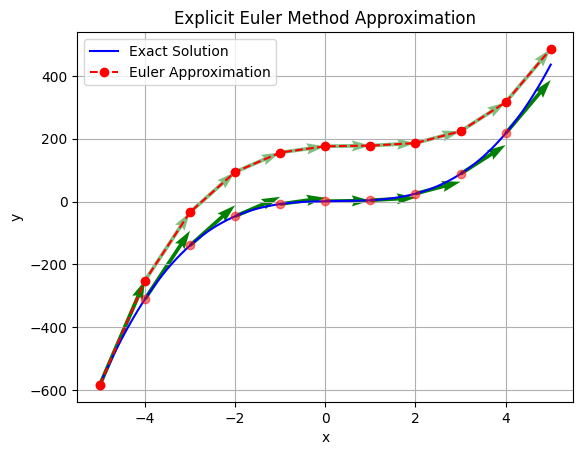

In [24]:
x_start = -5
x_end = 5
h = 1

x_continuous = np.linspace(x_start, x_end, 1000)
y_exact = lambda x: 4*x**3 - 3*x**2 + 2*x + 1
f = lambda x, y: 12*x**2 - 6*x + 2

x_discrete, y_impl_euler = expl_euler_method(f, y_exact(x_start), x_start, x_end, h)

plt.figure()
plt.plot(x_continuous, y_exact(x_continuous), label='Exact Solution', color='blue')
plt.plot(x_discrete, y_impl_euler, label=f'Euler Approximation', marker='o', linestyle='--', color='red')

# Plot the derivatives
for k in range(len(x_discrete)-1):
    plt.plot(x_discrete[k], y_exact(x_discrete[k]), marker='o', color='red', alpha=0.5)
    plt.quiver(x_discrete[k], y_exact(x_discrete[k]), h, h*f(x_discrete[k], y_impl_euler[k]), angles='xy', scale_units='xy', scale=1, color='green')
    plt.quiver(x_discrete[k], y_impl_euler[k], h, f(x_discrete[k], y_impl_euler[k])*h, angles='xy', scale_units='xy', scale=1, color='green', alpha=0.5)
    
plt.title('Explicit Euler Method Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

### Backward Euler method (implicit)

Backward difference:
$$
f(x, y) \approx \frac{y(x) - y(x-h)}{h}
$$
Discretized:
$$
f(x_k, y_k) \approx \frac{y_k - y_{k-1}}{h}
$$
Shift one timestep forward:
$$
f(x_{k+1}, y_{k+1}) \approx \frac{y_{k+1} - y_k}{h}
$$
Which results in:
$$
\boxed{
    y_{k+1} = y_k + h \cdot f(x_{k+1}, y_{k+1})
}
$$
But since $y_{k+1}$ is defined implicitly, this equation has to be solved for $y_{k+1}$. This can be done by using a root finding algorithm.


#### Root finding algorithm

First we move all terms to one side of the equation and define it as $g(y_{k+1})=0$:
$$
g(y_{k+1}) = y_{k+1} - h \cdot f(x_{k+1}, y_{k+1}) - y_k=0
$$
Finding $y_{k+1}$ involves finding the root of $g(y_{k+1})$. But unfortunately, $g(y_{k+1})$ can be a nasty nonlinear function of $y_{k+1}$. Such problems can be solved by using numerical methods.

#### Method implementation for plotting

In [25]:
def implicit_euler_method(f, y0, x_start, x_end, h):
    n_steps = math.ceil((x_end - x_start)/h)
    x = np.arange(x_start, x_end+h, h)
    y = np.zeros(n_steps+1)
    y[0] = y0
    
    for k in range(n_steps):
        zero_equation = lambda xk1: xk1 - y[k] - h*f(x[k + 1], xk1)
        y[k + 1] = fsolve(zero_equation, y[k])[0]
        
    return x, y

#### Illustration of the method

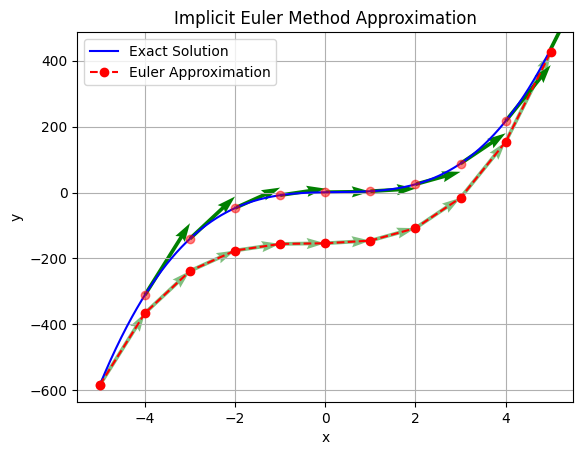

In [26]:
x_start = -5
x_end = 5
h = 1

x_continuous = np.linspace(x_start, x_end, 1000)
y_exact = lambda x: 4*x**3 - 3*x**2 + 2*x + 1
f = lambda x, y: 12*x**2 - 6*x + 2

x_discrete, y_impl_euler = implicit_euler_method(f, y_exact(x_start), x_start, x_end, h)

plt.figure()
plt.plot(x_continuous, y_exact(x_continuous), label='Exact Solution', color='blue')
plt.plot(x_discrete, y_impl_euler, label=f'Euler Approximation', marker='o', linestyle='--', color='red')

# Plot the derivatives
for k in range(len(x_discrete)-1):
    plt.plot(x_discrete[k], y_exact(x_discrete[k]), marker='o', color='red', alpha=0.5)
    plt.quiver(x_discrete[k+1], y_exact(x_discrete[k+1]), h, h*f(x_discrete[k+1], y_impl_euler[k+1]), angles='xy', scale_units='xy', scale=1, color='green')
    plt.quiver(x_discrete[k], y_impl_euler[k], h, f(x_discrete[k+1], y_impl_euler[k+1])*h, angles='xy', scale_units='xy', scale=1, color='green', alpha=0.5)
    
plt.title('Implicit Euler Method Approximation')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()